# Trabalho de apresentação de conhecimentos sobre SQL

### Aluno: Hugo Cezar Sales de Souza

Para demonstrar a aquisição de conhecimentos após o módulo "Banco de Dados I" ministrado pelo professor Aruã Souza, foi proposto um trabalho onde deve-se:
- Escolher um dataset com +1 tabelas no kaggle ou UCI
- Importar esse dataset para o PostgreSQL
- Fazer e documentar uma análise descritiva (preferencia a usar Jupyter notebook)
- Propor e responder algumas perguntas se baseando no dataset
- Upar em um repositório Git e disponibilizar o link.


Para o desenvolvimento do trabalho, o dataset escolhido está apresentando neste [link](https://www.kaggle.com/datasets/technika148/football-database). O dataset escolhido tem informações sobre as partidas de futebol que ocorrerão nas 5 principais ligas europeias.

## Conexão com o PostgreSQL

Para manipular a criação do Schema e das tabelas, a ferramenta utilizada é o [PostgreSQL](https://www.postgresql.org/). Após instalado e configurado, utiliza-se o PgAdmin4 como interface gráfica do banco de dados. Então, é criado um schema para abrigar as tabelas necessárias para o nosso trabalho. Ao clicar na opção Query Tool e digitar os comandos dentro do editor de queries.

<div align='center'>

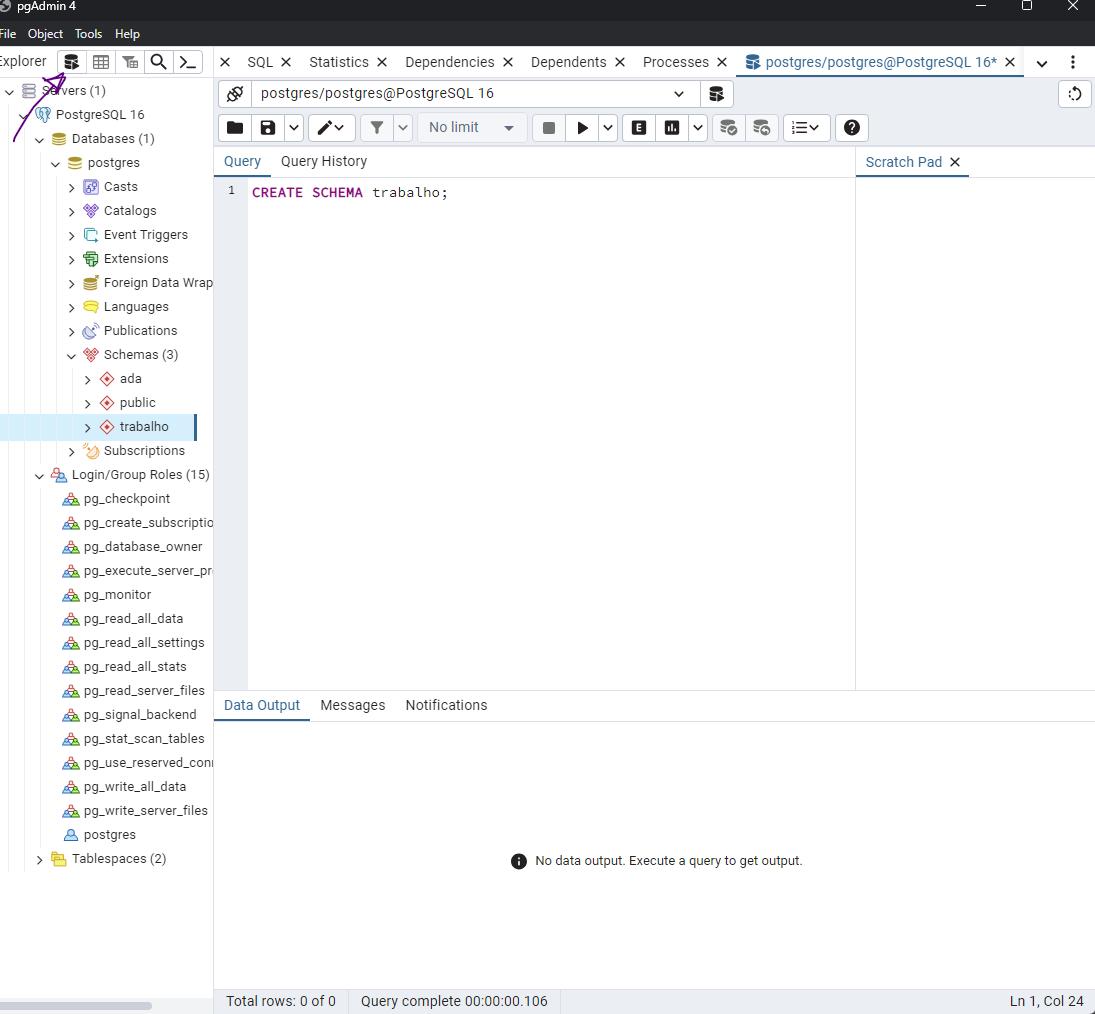

</div>

Após isso, conecta-se o PostgreSQL ao notebook jupyter para que possamos manipular as informações. A conexão entre as ferramentas é feita pelo código abaixo.

In [1]:
import pandas as pd 
import pandasql as ps
from sqlalchemy import create_engine

SGBD = "postgresql+psycopg2"
USER = "postgres"
SENHA = "hugo1997"
HOST = "localhost"
DATABASE = "postgres"

engine = create_engine(f"{SGBD}://{USER}:{SENHA}@{HOST}:5432/{DATABASE}")
engine.connect()

C:\Users\Nugrinho\AppData\Local\Temp\ipykernel_8772\3590872179.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Descrição e importação do Banco de Dados escolhido



Este banco de dados abrange informações das cinco principais ligas de futebol: Premier League (Inglaterra), Serie A (Itália), Bundesliga (Alemanha), La Liga (Espanha) e Ligue 1 (França), no período de 2014 a 2020. As informações contidas referem-se aos eventos das partidas, incluindo número de gols, cartões, substituições, tempo de jogo por jogador, e outros dados relevantes. A estrutura do banco de dados é relacional, o que o torna adequado para este projeto.

O conjunto de dados inclui sete tabelas, nomeadamente:

- **Apperances (Aparições dos jogadores)**
- **Games (Partidas)**
- **Leagues (Ligas)**
- **Players (Jogadores)**
- **Shoots (Chutes)**
- **Teams (Times)**
- **TeamStats (Estatísticas de cada time)**

A representação de cardinalidade entre as tabelas está diposto na imagem abaixo.Toda a estrutura de cardinalidade foi feita utilizando o software [BrModelo](http://www.sis4.com/brModelo/download.html#google_vignette).

<div align='center'>

![Cardinalidade](images/cardinalidade.png)

</div>

Entendida a relação de cardinalidade, dentro do PgAdmin4, é realizada a seguinte query para iniciar o Schema e as tabelas necessárias para inicialização do banco de dados.

```SQL
CREATE SCHEMA trabalho;

CREATE TABLE trabalho.players (
    playerID SERIAL PRIMARY KEY UNIQUE,
    name VARCHAR(100)
);

CREATE TABLE trabalho.leagues (
    leagueID SERIAL PRIMARY KEY,
    name VARCHAR,
    understatNotation VARCHAR(20),
    UNIQUE (leagueID, name, understatNotation)
);


CREATE TABLE trabalho.teams (
    teamID SERIAL PRIMARY KEY UNIQUE,
    name VARCHAR(50)
);


CREATE TABLE trabalho.games (
    gameID SERIAL PRIMARY KEY UNIQUE,
    leagueID INTEGER,
	season SMALLINT,
    date DATE,
    homeTeamID INTEGER,
    awayTeamID INTEGER,
    homeGoals SMALLINT,
    awayGoals SMALLINT,
    homeProbability FLOAT,
    drawProbability FLOAT,
    awayProbability FLOAT,
    homeGoalsHalfTime SMALLINT,
    awayGoalsHalfTime SMALLINT,
    B365H FLOAT,
    B365D FLOAT,
    B365A FLOAT,
    BWH FLOAT,
    BWD FLOAT,
    BWA FLOAT,
    IWH FLOAT,
    IWD FLOAT,
    IWA FLOAT,
    PSH FLOAT,
    PSD FLOAT,
    PSA FLOAT,
    WHH FLOAT,
    WHD FLOAT,
    WHA FLOAT,
    VCH FLOAT,
    VCD FLOAT,
    VCA FLOAT,
    PSCH FLOAT,
    PSCD FLOAT,
    PSCA FLOAT,
	FOREIGN KEY (leagueID) REFERENCES trabalho.leagues (leagueID),
	FOREIGN KEY (homeTeamID) REFERENCES trabalho.teams (teamID),
	FOREIGN KEY (awayTeamID) REFERENCES trabalho.teams (teamID)
);


CREATE TABLE trabalho.appearances (
    gameID INTEGER,
    playerID INTEGER,
    goals SMALLINT,
    ownGoals SMALLINT,
    shots VARCHAR(20),
    xGoals FLOAT,
    xGoalsChain FLOAT,
    xGoalsBuildup FLOAT,
	assists FLOAT,
    keyPasses SMALLINT,
    xAssists FLOAT,
    position VARCHAR,
    positionOrder SMALLINT,
    yellowCard SMALLINT,
    redCard SMALLINT,
    time INTEGER,
    substituteIn INTEGER,
    substituteOut INTEGER,
	leagueID INTEGER,
	FOREIGN KEY (gameID) REFERENCES trabalho.games (gameID),
	FOREIGN KEY (playerID) REFERENCES trabalho.players (playerID),
	FOREIGN KEY (leagueID) REFERENCES trabalho.leagues (leagueID)
);


CREATE TABLE trabalho.shots (
    gameID INTEGER,
    shooterID INTEGER,
    assisterID INTEGER,
    minute SMALLINT,
    situation VARCHAR,
    lastAction VARCHAR,
    shotType VARCHAR,
    shotResult VARCHAR,
    xGoal FLOAT,
    positionX FLOAT,
    positionY FLOAT,
	FOREIGN KEY (gameID) REFERENCES trabalho.games (gameID),
	FOREIGN KEY (shooterID) REFERENCES trabalho.players (playerID),
	FOREIGN KEY (assisterID) REFERENCES trabalho.players (playerID)
);

CREATE TABLE trabalho.teamstats (
    gameID INTEGER,
    teamID INTEGER,
    season SMALLINT,
    date DATE,
    location CHAR,
    goals SMALLINT,
    xGoals FLOAT,
    shots SMALLINT,
    shotsOnTarget SMALLINT,
    deep SMALLINT,
    ppda FLOAT,
    fouls SMALLINT,
    corners SMALLINT,
    yellowCards SMALLINT,
    redCards SMALLINT,
    result CHAR,
	FOREIGN KEY (gameID) REFERENCES trabalho.games (gameID),
	FOREIGN KEY (teamID) REFERENCES trabalho.teams (teamID)
);
```

---

Após a criação das tabelas, os dados da tabela foram importados para as tabelas dentro do PostgreSQL, através dos comandos:
```SQL
COPY trabalho.players FROM 'D:\Cursos\Ada Tech - Data Science\Banco de dados I\Trabalho Final\src\database\tables\players.csv' WITH (FORMAT csv, DELIMITER ',', ENCODING 'LATIN1', HEADER true);
SELECT * FROM trabalho.players LIMIT 10;

COPY trabalho.leagues FROM 'D:\Cursos\Ada Tech - Data Science\Banco de dados I\Trabalho Final\src\database\tables\leagues.csv' WITH (FORMAT csv, DELIMITER ',', ENCODING 'LATIN1', HEADER true);
SELECT * FROM trabalho.leagues LIMIT 10;

COPY trabalho.teams FROM 'D:\Cursos\Ada Tech - Data Science\Banco de dados I\Trabalho Final\src\database\tables\teams.csv' WITH (FORMAT csv, DELIMITER ',', ENCODING 'LATIN1', HEADER true);
SELECT * FROM trabalho.teams LIMIT 10;

COPY trabalho.games FROM 'D:\Cursos\Ada Tech - Data Science\Banco de dados I\Trabalho Final\src\database\tables\games.csv' WITH (FORMAT csv, DELIMITER ',', ENCODING 'LATIN1', HEADER true, NULL 'NA');
SELECT * FROM trabalho.games LIMIT 10;

COPY trabalho.teamstats FROM 'D:\Cursos\Ada Tech - Data Science\Banco de dados I\Trabalho Final\src\database\tables\teamstats.csv' WITH (FORMAT csv, DELIMITER ',', ENCODING 'LATIN1', HEADER true, NULL 'NA');
SELECT * FROM trabalho.teamstats LIMIT 10;

INSERT INTO trabalho.leagues (leagueid, name) VALUES (0, 'Liga inexistente');
COPY trabalho.appearances FROM 'D:\Cursos\Ada Tech - Data Science\Banco de dados I\Trabalho Final\src\database\tables\appearances.csv' WITH (FORMAT csv, DELIMITER ',', ENCODING 'LATIN1', HEADER true);
SELECT * FROM trabalho.appearances LIMIT 10;

COPY trabalho.shots FROM 'D:\Cursos\Ada Tech - Data Science\Banco de dados I\Trabalho Final\src\database\tables\shots.csv' WITH (FORMAT csv, DELIMITER ',', ENCODING 'LATIN1', HEADER true, NULL 'NA');
SELECT * FROM trabalho.shots LIMIT 10;
```

---

Como há valores dentro das colunas numéricas que estão dispostos como NA (Não disponível, do inglês, *Not available*), esses valores foram substituídos para serem importados corretamente como nulos dentro do banco de dados. 

Dentro da tabela "*Appearances*", existem alguns valores dentro da chave estrangeira "*leagueid*" com valores iguais a 0. Nesse caso, a correção foi criar dentro da tabela "*leagues*" um valor com o *leagueid* 0 e o nome de "liga inexistente" para que possamos importar os valores corretamente para o PostgreSQL.






## Análise descritiva da base de dados

Após a inicialização das bibliotecas, a conexão do júpyter notebook com o postgres, a criação do schema e das tabelas e, importação dos dados da base da dados para dentro das tabelas inicializadas, podemos começas a manipulação do banco dentro do Júpyter. Observando a imagem [de cardinalidade](trabalho.ipynb#descrição-e-importação-do-banco-de-dados-escolhido), vemos que as tabelas *leagues*, *teams* e *players* não tem dependencias de nenhuma tabela.

In [2]:
query = """
SELECT *
FROM
trabalho.leagues
"""
leagues = pd.read_sql_query(query, con = engine)

query = """
SELECT *
FROM
trabalho.teams
"""
teams = pd.read_sql_query(query, con = engine)

query = """
SELECT *
FROM
trabalho.players
"""
players = pd.read_sql_query(query, con = engine)

leagues.info()
teams.info()
players.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   leagueid           6 non-null      int64 
 1   name               6 non-null      object
 2   understatnotation  5 non-null      object
dtypes: int64(1), object(2)
memory usage: 276.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   teamid  146 non-null    int64 
 1   name    146 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7659 entries, 0 to 7658
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   playerid  7659 non-null   int64 
 1   name      7659 non-null   object
dtypes: int64(1), object(1)
memory usage: 119.8+ KB


Vemos que nesta tabela, todos os valores estão completos, com exceção da inserção que fizemos na tabela *leagues* para que a chave primária consiga ser correlacionada na tabela *appearances*.

---

Vamos analisar sequencialmente as tabelas agora, conforme a importação delas para dentro do PostgreSQL. A tabela a ser analisada agora é a tabela *games*.

In [3]:
query = """
SELECT *
FROM
trabalho.games
"""
games = pd.read_sql_query(query, con = engine)

games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12680 entries, 0 to 12679
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gameid             12680 non-null  int64  
 1   leagueid           12680 non-null  int64  
 2   season             12680 non-null  int64  
 3   date               12680 non-null  object 
 4   hometeamid         12680 non-null  int64  
 5   awayteamid         12680 non-null  int64  
 6   homegoals          12680 non-null  int64  
 7   awaygoals          12680 non-null  int64  
 8   homeprobability    12680 non-null  float64
 9   drawprobability    12680 non-null  float64
 10  awayprobability    12680 non-null  float64
 11  homegoalshalftime  12680 non-null  int64  
 12  awaygoalshalftime  12680 non-null  int64  
 13  b365h              12675 non-null  float64
 14  b365d              12675 non-null  float64
 15  b365a              12675 non-null  float64
 16  bwh                126

Vemos através desta análise que os valores nulos nas tabelas são os valores de pagamento das apostas (*"bets"*), que correspondem às colunas a partir da coluna número 13. Infelizmente, nem mesmo no repositório dentro do Kaggle há distinção de todas as casas de apostas. A única referência pela qual foi possível distinguir que se tratavam de odds de casa de apostas foi o conhecimento prévio do autor do trabalho sobre este tipo de modalidade e o conhecimento sobre a casa de apostas mais famosa, a bet365. Podemos observar que após a coluna 12, existe um agrupamento de 3 colunas com o mesmo prefixo, variando apenas no sufixo em h (casa, do inglês, *home*, que se refere à vitória do time que está jogando em seu estádio), d (empate, do inglês, *draw*, que se refere a um empate) e a (fora, do inglês, *away*, que se refere à vitória do time que está jogando no estádio do adversário). Concluímos que estas são as odds coletadas antes do início dos jogos sobre o resultado da partida.

Portanto, ao nos referirmos a estas colunas, iremos nos referenciar a estes valores de casa de apostas conforme o prefixo da coluna. Vemos que a casa de apostas *"ps"* é a casa de apostas com mais valores faltantes. 

A coluna "*season*" diz respeitos as temporadas. Como temos valores fixos de temporada, vamos verificar quantas temporadas foram contabilizadas:

In [4]:
query = """
SELECT DISTINCT ts.season as Temporada
FROM
trabalho.teamstats as ts
ORDER BY Temporada
"""
pd.read_sql_query(query, con = engine)

,temporada
0,2014
1,2015
2,2016
3,2017
4,2018
5,2019
6,2020


--- 

Agora analisaremos a tabela *"team stats"*.

In [5]:
query = """
SELECT *
FROM
trabalho.teamstats
"""
teamstats = pd.read_sql_query(query, con = engine)

teamstats.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25360 entries, 0 to 25359
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gameid         25360 non-null  int64  
 1   teamid         25360 non-null  int64  
 2   season         25360 non-null  int64  
 3   date           25360 non-null  object 
 4   location       25360 non-null  object 
 5   goals          25360 non-null  int64  
 6   xgoals         25360 non-null  float64
 7   shots          25360 non-null  int64  
 8   shotsontarget  25360 non-null  int64  
 9   deep           25360 non-null  int64  
 10  ppda           25360 non-null  float64
 11  fouls          25360 non-null  int64  
 12  corners        25360 non-null  int64  
 13  yellowcards    25359 non-null  float64
 14  redcards       25360 non-null  int64  
 15  result         25360 non-null  object 
dtypes: float64(3), int64(10), object(3)
memory usage: 3.1+ MB


Vemos que há apenas um valor nulo dentro desta tabela. Vamos verificar se este valor nulo corresponde a nenhum cartão amarelo ou se é de fato uma informação faltante sobre o jogo.


In [6]:
query = """
SELECT
    COUNT(*) FILTER (WHERE ts.yellowcards IS NULL) AS matches_null_yellowCard,
    COUNT(*) FILTER (WHERE ts.yellowcards = 0) AS matches_0_yellowCard
FROM trabalho.teamstats AS ts;
"""
pd.read_sql_query(query, con = engine)

,matches_null_yellowcard,matches_0_yellowcard
0,1,3169


Através desta query, é possível distinguir que realmente há um valor esquecido ou faltante sobre os cartões amarelos. Dentro dessa tabela verificamos também, que há duas variáveis categóricas: *result* e *location*. Result informa o resultado da partida e location se o jogo foi feito em casa ou fora, tudo referente ao time que esta referenciado pelo *teamID*. Ao analisarmos as variáveis categóricas temos:




In [7]:
query = """
SELECT DISTINCT ts.result as Resultado
FROM
trabalho.teamstats as ts
ORDER BY Resultado
"""
pd.read_sql_query(query, con = engine)

,resultado
0,D
1,L
2,W


In [8]:
query = """
SELECT DISTINCT ts.location as Mandante
FROM
trabalho.teamstats as ts
ORDER BY Mandante
"""
pd.read_sql_query(query, con = engine)

,mandante
0,a
1,h


Para a coluna result, a variável categórica assume 3 valores: W (Vitória), D (Empate) e L (Derrota). Já em location, existem apenas 2 valores: h (Em casa) e a (Fora de casa).


---

Agora, analisaremos a tabela *appearances*:

In [9]:
query = """
SELECT *
FROM
trabalho.appearances
"""
appearances = pd.read_sql_query(query, con = engine)

appearances.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356513 entries, 0 to 356512
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameid         356513 non-null  int64  
 1   playerid       356513 non-null  int64  
 2   goals          356513 non-null  int64  
 3   owngoals       356513 non-null  int64  
 4   shots          356513 non-null  object 
 5   xgoals         356513 non-null  float64
 6   xgoalschain    356513 non-null  float64
 7   xgoalsbuildup  356513 non-null  float64
 8   assists        356513 non-null  float64
 9   keypasses      356513 non-null  int64  
 10  xassists       356513 non-null  float64
 11  position       356513 non-null  object 
 12  positionorder  356513 non-null  int64  
 13  yellowcard     356513 non-null  int64  
 14  redcard        356513 non-null  int64  
 15  time           356513 non-null  int64  
 16  substitutein   356513 non-null  int64  
 17  substituteout  356513 non-nul

Não há nenhum valor nulo na tabela *appearances*. Contudo, ao analisar esta tabela, notamos uma variável categórica: *position*. A variável *positionorder* está diretamente relacionada à posição, o que pode ser interpretado como valores redundantes, pois a variável *position* é categorizada por string e a variável *positionorder* é categorizada numericamente. Esta relação pode ser observada no código abaixo:


In [10]:
query = """
SELECT DISTINCT ap.position, ap.positionorder
FROM trabalho.appearances as ap
ORDER BY positionorder
"""
pd.read_sql_query(query, con = engine)

,position,positionorder
0,GK,1
1,DR,2
2,DC,3
3,DL,4
4,DMR,5
5,DML,6
6,DMC,7
7,MR,8
8,MC,9
9,ML,10


--- 

Por fim, a tabela *shots*:

In [11]:
query = """
SELECT *
FROM
trabalho.shots
"""
shots = pd.read_sql_query(query, con = engine)

shots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324543 entries, 0 to 324542
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   gameid      324543 non-null  int64  
 1   shooterid   324543 non-null  int64  
 2   assisterid  240199 non-null  float64
 3   minute      324543 non-null  int64  
 4   situation   324543 non-null  object 
 5   lastaction  324543 non-null  object 
 6   shottype    324543 non-null  object 
 7   shotresult  324543 non-null  object 
 8   xgoal       324543 non-null  float64
 9   positionx   324543 non-null  float64
 10  positiony   324543 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 27.2+ MB


A única coluna que não possui valores é a coluna *"assisterid"*, o que é esperado. No futebol, uma assistência é contabilizada quando um jogador passa a bola para outro de forma que o jogador que recebe a bola fique em posição clara de fazer gol. Caso seja um rebote, desvie em outro jogador, ou o jogador que recebe a bola não esteja em uma posição clara de fazer gol, exigindo que ele inicie a construção de uma nova jogada, não é contabilizada como assistência. 

Temos algumas variáveis categóricas nesta tablea: *situation*, *lastaction*, *shottype* e *shotresult*. Vamos fazer consultas para determinar os valores categóricos de cada coluna.



In [12]:
query = """
SELECT DISTINCT sh.situation
FROM trabalho.shots as sh
ORDER BY situation
"""
pd.read_sql_query(query, con = engine)

,situation
0,DirectFreekick
1,FromCorner
2,OpenPlay
3,Penalty
4,SetPiece


In [13]:
query = """
SELECT DISTINCT sh.lastaction  
FROM trabalho.shots as sh
ORDER BY lastaction  
"""
pd.read_sql_query(query, con = engine)

,lastaction
0,Aerial
1,BallRecovery
2,BallTouch
3,BlockedPass
4,Card
5,Challenge
6,ChanceMissed
7,Chipped
8,Clearance
9,CornerAwarded


In [14]:
query = """
SELECT DISTINCT sh.shottype      
FROM trabalho.shots as sh
ORDER BY shottype      
"""
pd.read_sql_query(query, con = engine)

,shottype
0,Head
1,LeftFoot
2,OtherBodyPart
3,RightFoot


In [15]:
query = """
SELECT DISTINCT sh.shotresult        
FROM trabalho.shots as sh
ORDER BY shotresult        
"""
pd.read_sql_query(query, con = engine)

,shotresult
0,BlockedShot
1,Goal
2,MissedShots
3,OwnGoal
4,SavedShot
5,ShotOnPost



---

Após verificarmos todas as tabelas e seus valores nulos e categóricos, começaremos as análises exploratórias.

## Análise exploratória do banco de dados

Assim como na análise descritiva, faremos a análise exploratória seguindo a sequencia de importação e criação das tabelas. Sendo assim, as primeiras 3 tabelas, *leagues*,*teams* e *players* apenas relacionam as aparições unicas de cada liga, time e jogador que já atuaram em algum jogo entre 2014 e 2020 dentro das 5 maiores ligas européias.


### Tabela *Games*


Analisando a tabela de jogos, fazemos uma volta ao passado e relembramos que a unica temporada em que a quantidade de partidas é substancialmente menor é a temporada 2019, onde tivemos a [pandemia de covid-19](https://pt.wikipedia.org/wiki/Pandemia_de_COVID-19), encerrando os jogos 3 meses antes do que é normalmente esperado.

A temporada de 2016 tem um jogo a menos, o que pode ser uma lacuna nos dados.

In [16]:
query = """
SELECT  g.season as Temporada, 
        COUNT(*) as Quantidade_Partidas,
        MIN(g.date) as Começo,
        MAX(g.date) as Fim
FROM trabalho.games as g
GROUP BY g.season
ORDER BY g.season
"""
pd.read_sql_query(query, con = engine)

,temporada,quantidade_partidas,começo,fim
0,2014,1826,2014-08-08,2015-05-31
1,2015,1826,2015-08-07,2016-05-17
2,2016,1825,2016-08-12,2017-05-28
3,2017,1826,2017-08-04,2018-05-20
4,2018,1826,2018-08-10,2019-05-26
5,2019,1725,2019-08-09,2020-08-02
6,2020,1826,2020-08-21,2021-05-23


Conseguimos verificar a quantidade padrão de jogos de cada temporada por cada uma das ligas fazendo a query abaixo, onde, foram contadas todas as aparições de um time, seja jogando em casa ou fora, agrupando e contando quantas partidas foram feitas.

In [17]:
query = """
SELECT  
        MAX(Premier) AS Jogos_Premier,
        MAX(SerieA) AS Jogos_SerieA,
        MAX(Bundesliga) AS Jogos_Bundesliga,
        MAX(Laliga) AS Jogos_LaLiga,
        MAX(Ligue1) AS Jogos_Ligue1
FROM (
        SELECT 
                COUNT(*) AS Premier,
                0 AS SerieA,
                0 AS Bundesliga,
                0 AS Laliga,
                0 AS Ligue1
        FROM 
                trabalho.games as g
        LEFT JOIN
                trabalho.teams AS t
                ON      g.hometeamid = t.teamid OR
                        g.awayteamid = t.teamid
        WHERE 
                g.leagueid = 1 AND g.season = 2014
        GROUP BY 
                t.name

        UNION ALL
        
        SELECT 
                0 AS Premier,
                COUNT(*) AS SerieA,
                0 AS Bundesliga,
                0 AS Laliga,
                0 AS Ligue1
        FROM 
                trabalho.games as g
        LEFT JOIN
                trabalho.teams AS t
                ON      g.hometeamid = t.teamid OR
                        g.awayteamid = t.teamid
        WHERE 
                g.leagueid = 2 AND g.season = 2014
        GROUP BY 
                t.name
                
        UNION ALL
        
        SELECT 
                0 AS Premier,
                0 AS SerieA,
                COUNT(*) AS Bundesliga,
                0 AS Laliga,
                0 AS Ligue1
        FROM 
                trabalho.games as g
        LEFT JOIN
                trabalho.teams AS t
                ON      g.hometeamid = t.teamid OR
                        g.awayteamid = t.teamid
        WHERE 
                g.leagueid = 3 AND g.season = 2014
        GROUP BY 
                t.name
        UNION ALL
        
        SELECT 
                0 AS Premier,
                0 AS SerieA,
                0 AS Bundesliga,
                COUNT(*) AS Laliga,
                0 AS Ligue1
        FROM 
                trabalho.games as g
        LEFT JOIN
                trabalho.teams AS t
                ON      g.hometeamid = t.teamid OR
                        g.awayteamid = t.teamid
        WHERE 
                g.leagueid = 4 AND g.season = 2014
        GROUP BY 
                t.name
                
        UNION ALL
        
        SELECT 
                0 AS Premier,
                0 AS SerieA,
                0 AS Bundesliga,
                0 AS Laliga,
                COUNT(*) AS Ligue1
        FROM 
                trabalho.games as g
        LEFT JOIN
                trabalho.teams AS t
                ON      g.hometeamid = t.teamid OR
                        g.awayteamid = t.teamid
        WHERE 
                g.leagueid = 5 AND g.season = 2014
        GROUP BY 
                t.name
        )
AS MaximoJogos

"""
pd.read_sql_query(query, con = engine)

,jogos_premier,jogos_seriea,jogos_bundesliga,jogos_laliga,jogos_ligue1
0,38,38,34,38,38


Com essa referencia podemos verificar quantas partidas foram completas na temporada 2019, que foi a temporada interrompida pela pandemia de covid-19.

In [18]:
query = """
SELECT  
        MAX(Premier) AS Jogos_Premier,
        MAX(SerieA) AS Jogos_SerieA,
        MAX(Bundesliga) AS Jogos_Bundesliga,
        MAX(Laliga) AS Jogos_LaLiga,
        MAX(Ligue1) AS Jogos_Ligue1
FROM (
        SELECT 
                COUNT(*) AS Premier,
                0 AS SerieA,
                0 AS Bundesliga,
                0 AS Laliga,
                0 AS Ligue1
        FROM 
                trabalho.games as g
        LEFT JOIN
                trabalho.teams AS t
                ON      g.hometeamid = t.teamid OR
                        g.awayteamid = t.teamid
        WHERE 
                g.leagueid = 1 AND g.season = 2019
        GROUP BY 
                t.name

        UNION ALL
        
        SELECT 
                0 AS Premier,
                COUNT(*) AS SerieA,
                0 AS Bundesliga,
                0 AS Laliga,
                0 AS Ligue1
        FROM 
                trabalho.games as g
        LEFT JOIN
                trabalho.teams AS t
                ON      g.hometeamid = t.teamid OR
                        g.awayteamid = t.teamid
        WHERE 
                g.leagueid = 2 AND g.season = 2019
        GROUP BY 
                t.name
                
        UNION ALL
        
        SELECT 
                0 AS Premier,
                0 AS SerieA,
                COUNT(*) AS Bundesliga,
                0 AS Laliga,
                0 AS Ligue1
        FROM 
                trabalho.games as g
        LEFT JOIN
                trabalho.teams AS t
                ON      g.hometeamid = t.teamid OR
                        g.awayteamid = t.teamid
        WHERE 
                g.leagueid = 3 AND g.season = 2019
        GROUP BY 
                t.name
        UNION ALL
        
        SELECT 
                0 AS Premier,
                0 AS SerieA,
                0 AS Bundesliga,
                COUNT(*) AS Laliga,
                0 AS Ligue1
        FROM 
                trabalho.games as g
        LEFT JOIN
                trabalho.teams AS t
                ON      g.hometeamid = t.teamid OR
                        g.awayteamid = t.teamid
        WHERE 
                g.leagueid = 4 AND g.season = 2019
        GROUP BY 
                t.name
                
        UNION ALL
        
        SELECT 
                0 AS Premier,
                0 AS SerieA,
                0 AS Bundesliga,
                0 AS Laliga,
                COUNT(*) AS Ligue1
        FROM 
                trabalho.games as g
        LEFT JOIN
                trabalho.teams AS t
                ON      g.hometeamid = t.teamid OR
                        g.awayteamid = t.teamid
        WHERE 
                g.leagueid = 5 AND g.season = 2019
        GROUP BY 
                t.name
        )
AS MaximoJogos

"""
pd.read_sql_query(query, con = engine)

,jogos_premier,jogos_seriea,jogos_bundesliga,jogos_laliga,jogos_ligue1
0,38,38,34,38,28


Vemos que a unica liga que foi devidamente afetada na sua execução pela covid-19 foi a liga francesa. Com essa informação, podemos então descobrir qual a quantidade de partidas em cada liga para verificar quais times não foram rebaixados entre essas temporadas. Para cada liga temos:
- Premier league = 38 jogos * 7 temporadas = 266 jogos
- Serie A = 38 jogos * 7 temporadas = 266 jogos
- Bundesliga = 38 jogos * 7 temporadas = 238 jogos
- La liga = 38 jogos * 7 temporadas = 266 jogos
- Ligue 1 = 38 jogos * 6 temporadas + 28 jogos = 256 jogos

A consulta abaixo irá utilizar esses valores para encontrar quais times fizeram a quantidade máxima de jogos dentro de cada liga. 


In [19]:
query = """
WITH times_3ligas AS(
        SELECT  
                COUNT(*) AS quantidade_partidas,
                t.name AS time,
                l.name AS liga
        FROM 
                trabalho.games AS g
        LEFT JOIN
                trabalho.teams AS t
                ON      g.hometeamid = t.teamid OR
                        g.awayteamid = t.teamid
        LEFT JOIN
                trabalho.leagues AS l
                ON      g.leagueid = l.leagueid
        WHERE
                g.leagueid IN (1,2,4)
        GROUP BY 
                t.name, l.name
        HAVING
                COUNT(*) >= 260
        ORDER BY 
                liga, time 
), times_bundes AS(
        SELECT  
                COUNT(*) AS quantidade_partidas,
                t.name AS time,
                l.name AS liga
        FROM 
                trabalho.games AS g
        LEFT JOIN
                trabalho.teams AS t
                ON      g.hometeamid = t.teamid OR
                        g.awayteamid = t.teamid
        LEFT JOIN
                trabalho.leagues AS l
                ON      g.leagueid = l.leagueid
        WHERE
                g.leagueid = 3
        GROUP BY 
                t.name, l.name
        HAVING
                COUNT(*) >= 230
        ORDER BY 
                liga, time 
), times_ligue1 AS(
        SELECT  
                COUNT(*) AS quantidade_partidas,
                t.name AS time,
                l.name AS liga
        FROM 
                trabalho.games AS g
        LEFT JOIN
                trabalho.teams AS t
                ON      g.hometeamid = t.teamid OR
                        g.awayteamid = t.teamid
        LEFT JOIN
                trabalho.leagues AS l
                ON      g.leagueid = l.leagueid
        WHERE
                g.leagueid = 5
        GROUP BY 
                t.name, l.name
        HAVING
                COUNT(*) >= 250
        ORDER BY 
                liga, time       
)

SELECT *
FROM times_3ligas
UNION ALL
SELECT *
FROM times_bundes
UNION ALL
SELECT *
FROM times_ligue1
"""
pd.read_sql_query(query, con = engine)


,quantidade_partidas,time,liga
0,238,Augsburg,Bundesliga
1,238,Bayer Leverkusen,Bundesliga
2,238,Bayern Munich,Bundesliga
3,238,Borussia Dortmund,Bundesliga
4,238,Borussia M.Gladbach,Bundesliga
5,238,Eintracht Frankfurt,Bundesliga
6,238,Hertha Berlin,Bundesliga
7,238,Hoffenheim,Bundesliga
8,238,Mainz 05,Bundesliga
9,238,Schalke 04,Bundesliga



Podemos também verificar os times que jogaram apenas uma temporada em uma das 5 grandes ligas.

In [20]:
query = """
SELECT  
    COUNT(*) AS quantidade_partidas,
    t.name AS time,
    l.name AS liga
FROM 
    trabalho.games AS g
LEFT JOIN
    trabalho.teams AS t
    ON  g.hometeamid = t.teamid OR
        g.awayteamid = t.teamid
LEFT JOIN
    trabalho.leagues AS l
    ON  g.leagueid = l.leagueid
GROUP BY 
    t.name, l.name
HAVING
    COUNT(*) <= 40
ORDER BY 
    liga, time 
"""
pd.read_sql_query(query, con = engine)


,quantidade_partidas,time,liga
0,34,Arminia Bielefeld,Bundesliga
1,34,Nuernberg,Bundesliga
2,38,Almeria,La Liga
3,38,Cadiz,La Liga
4,38,Cordoba,La Liga
5,38,Mallorca,La Liga
6,38,Evian Thonon Gaillard,Ligue 1
7,38,GFC Ajaccio,Ligue 1
8,38,Nancy,Ligue 1
9,38,Cardiff,Premier League


Ainda dentro dessa tabela, podemos verificar como a performance dos times melhora ao jogar em casa, tanto em quantidade de vitórias quanto em quantidade de gols.

In [21]:
query = """
SELECT  
        SUM(g.homegoals) AS Gols_Casa,
        SUM(g.awaygoals) AS Gols_Fora,
        COUNT(CASE WHEN g.homegoals > g.awaygoals THEN 1 END) AS vitória_casa,
        COUNT(CASE WHEN g.homegoals = g.awaygoals THEN 1 END) AS empate,
        COUNT(CASE WHEN g.homegoals < g.awaygoals THEN 1 END) AS derrota_casa
FROM 
        trabalho.games AS g

"""
pd.read_sql_query(query, con = engine)


,gols_casa,gols_fora,vitória_casa,empate,derrota_casa
0,19441,15300,5654,3172,3854


Verificando as colunas de probabilidades, vamos analisar se, quando a probabilidade é maior que 50%, o resultado do jogo segue a taxa de probabilidade.

In [22]:
query = """
SELECT  
    'vitória' AS tipo,
    COUNT(CASE WHEN g.homegoals > g.awaygoals THEN 1 END) AS quantidades_confirmados,
    COUNT(*) AS quantidades_query,
    (COUNT(CASE WHEN g.homegoals > g.awaygoals THEN 1 END) * 100.0 / COUNT(*)) AS proporcao
FROM 
    trabalho.games AS g
WHERE
    g.homeprobability > 0.5

UNION ALL

SELECT  
    'empate' AS tipo,
    COUNT(CASE WHEN g.homegoals = g.awaygoals THEN 1 END) AS quantidades_confirmados,
    COUNT(*) AS quantidades_query,
    (COUNT(CASE WHEN g.homegoals = g.awaygoals THEN 1 END) * 100.0 / COUNT(*)) AS proporcao
FROM 
    trabalho.games AS g
WHERE
    g.drawprobability > 0.5

UNION ALL

SELECT  
    'derrota' AS tipo,
    COUNT(CASE WHEN g.homegoals < g.awaygoals THEN 1 END) AS quantidades_confirmados,
    COUNT(*) AS quantidades_query,
    (COUNT(CASE WHEN g.homegoals < g.awaygoals THEN 1 END) * 100.0 / COUNT(*)) AS proporcao
FROM 
    trabalho.games AS g
WHERE
    g.awayprobability > 0.5;


"""
pd.read_sql_query(query, con = engine)

,tipo,quantidades_confirmados,quantidades_query,proporcao
0,vitória,3812,5388,70.749814
1,empate,87,167,52.095808
2,derrota,2091,3115,67.126806


Se analisarmos essas consultas, observamos que quando a probabilidade do evento é definida como maior que 50%, esses eventos têm grandes probabilidades de acontecimento, principalmente se tratando de vitórias quando o time joga em casa.

### Tabela *Team Stats*

Utilizando esta tabela conseguimos verificar quem são os times que mais goleadores, que mais cometem faltas, que mais ganharam, que mais tomaram cartões dentro do recorte temporal das temporada de 2014 á 2020.

Começaremos com os times mais goleadores

In [68]:
query = """
SELECT  
    ts.teamid AS ID,
    t.name AS Time,
    SUM(ts.goals) AS Total_gols,
    l.name as Liga
FROM
    trabalho.teamstats as ts
LEFT JOIN
    trabalho.games AS g
    ON  ts.gameid = g.gameid
LEFT JOIN
    trabalho.teams AS t
    ON  ts.teamid = t.teamid
LEFT JOIN
    trabalho.leagues AS l
    ON  g.leagueid = l.leagueid
GROUP BY
    ts.teamid, t.name, l.name
ORDER BY
    Total_gols DESC
LIMIT 20
"""
pd.read_sql_query(query, con = engine)

,id,time,total_gols,liga
0,148,Barcelona,698,La Liga
1,161,Paris Saint Germain,642,Ligue 1
2,117,Bayern Munich,628,Bundesliga
3,150,Real Madrid,628,La Liga
4,88,Manchester City,620,Premier League
5,105,Napoli,542,Serie A
6,98,Juventus,533,Serie A
7,87,Liverpool,519,Premier League
8,129,Borussia Dortmund,505,Bundesliga
9,95,Roma,499,Serie A


Times que mais chutam:

In [69]:
query = """
SELECT  
    ts.teamid AS ID,
    t.name AS Time,
    SUM(ts.shots) AS Chutes,
    l.name as Liga
FROM
    trabalho.teamstats as ts
LEFT JOIN
    trabalho.games AS g
    ON  ts.gameid = g.gameid
LEFT JOIN
    trabalho.teams AS t
    ON  ts.teamid = t.teamid
LEFT JOIN
    trabalho.leagues AS l
    ON  g.leagueid = l.leagueid
GROUP BY
    ts.teamid, t.name, l.name
ORDER BY
    Chutes DESC
LIMIT 20
"""
pd.read_sql_query(query, con = engine)

,id,time,chutes,liga
0,105,Napoli,4645,Serie A
1,88,Manchester City,4609,Premier League
2,150,Real Madrid,4463,La Liga
3,87,Liverpool,4267,Premier League
4,117,Bayern Munich,4261,Bundesliga
5,95,Roma,4239,Serie A
6,98,Juventus,4220,Serie A
7,106,Inter,4144,Serie A
8,148,Barcelona,4097,La Liga
9,80,Chelsea,4065,Premier League


Times que mais convertem chutes (precisam de menos chutes pra fazer gol)

In [78]:
query = """
SELECT  
    ts.teamid AS ID,
    t.name AS Time,
    SUM(ts.shots)/SUM(ts.goals) AS Chutes_pra_gols,
    l.name as Liga
FROM
    trabalho.teamstats as ts
LEFT JOIN
    trabalho.games AS g
    ON  ts.gameid = g.gameid
LEFT JOIN
    trabalho.teams AS t
    ON  ts.teamid = t.teamid
LEFT JOIN
    trabalho.leagues AS l
    ON  g.leagueid = l.leagueid
GROUP BY
    ts.teamid, t.name, l.name
ORDER BY
    Chutes_pra_gols
LIMIT 20
"""
pd.read_sql_query(query, con = engine)

,id,time,chutes_pra_gols,liga
0,148,Barcelona,5,La Liga
1,161,Paris Saint Germain,5,Ligue 1
2,129,Borussia Dortmund,6,Bundesliga
3,117,Bayern Munich,6,Bundesliga
4,178,Lyon,7,Ligue 1
5,260,Spezia,7,Serie A
6,83,Arsenal,7,Premier League
7,150,Real Madrid,7,La Liga
8,130,Borussia M.Gladbach,7,Bundesliga
9,136,RasenBallsport Leipzig,7,Bundesliga


É possivel observar que os times mais goleadores são os que tem uma boa taxa de conversão entre precisar de poucos chutes para fazer gols. Agora, veremos os times mais faltosos.

In [86]:
query = """
SELECT  
    ts.teamid AS ID,
    t.name AS Time,
    SUM(ts.fouls) AS faltas,
    l.name as Liga
FROM
    trabalho.teamstats as ts
LEFT JOIN
    trabalho.games AS g
    ON  ts.gameid = g.gameid
LEFT JOIN
    trabalho.teams AS t
    ON  ts.teamid = t.teamid
LEFT JOIN
    trabalho.leagues AS l
    ON  g.leagueid = l.leagueid
GROUP BY
    ts.teamid, t.name, l.name
ORDER BY
    faltas DESC
LIMIT 20
"""
pd.read_sql_query(query, con = engine)

,id,time,faltas,liga
0,113,Torino,4131,Serie A
1,101,Genoa,4074,Serie A
2,107,Atalanta,3897,Serie A
3,138,Sevilla,3854,La Liga
4,110,Fiorentina,3757,Serie A
5,142,Getafe,3722,La Liga
6,156,Eibar,3717,La Liga
7,96,Lazio,3705,Serie A
8,104,Sassuolo,3664,Serie A
9,111,AC Milan,3643,Serie A


In [92]:
query = """
SELECT
    f.liga,
    SUM(f.faltas) AS Faltas_liga
FROM(
    SELECT  
        ts.teamid AS ID,
        t.name AS Time,
        SUM(ts.fouls) AS faltas,
        l.name as Liga
    FROM
        trabalho.teamstats as ts
    LEFT JOIN
        trabalho.games AS g
        ON  ts.gameid = g.gameid
    LEFT JOIN
        trabalho.teams AS t
        ON  ts.teamid = t.teamid
    LEFT JOIN
        trabalho.leagues AS l
        ON  g.leagueid = l.leagueid
    GROUP BY
        ts.teamid, t.name, l.name
    ORDER BY
        faltas DESC
) AS f
GROUP BY
    f.liga
ORDER BY
    faltas_liga DESC
"""
pd.read_sql_query(query, con = engine)

,liga,faltas_liga
0,Serie A,74232.0
1,La Liga,73053.0
2,Ligue 1,67042.0
3,Premier League,57506.0
4,Bundesliga,56720.0


Há de ser observar que as ligas portuguesa e espanhola são as ligas que tem os times mais faltoso e há uma grande diferença no número de faltas para as outras 3 ligas (>6mil faltas). Pode ser por um arbitragem mais rígida ou por um jogo mais físico. Essas hipóteses devem ser testadas, assistindo os jogos, reunindo comentário de especialista, lendo as súmulas das partidas.

Seguindo a análise, vemos as quantidades de cartões amarelos e vermelhos.

In [82]:
query = """
SELECT  
    ts.teamid AS ID,
    t.name AS Time,
    SUM(ts.yellowcards) AS cartoes_amarelos,
    l.name as Liga
FROM
    trabalho.teamstats as ts
LEFT JOIN
    trabalho.games AS g
    ON  ts.gameid = g.gameid
LEFT JOIN
    trabalho.teams AS t
    ON  ts.teamid = t.teamid
LEFT JOIN
    trabalho.leagues AS l
    ON  g.leagueid = l.leagueid
GROUP BY
    ts.teamid, t.name, l.name
ORDER BY
    cartoes_amarelos DESC
LIMIT 20
"""
pd.read_sql_query(query, con = engine)

,id,time,cartoes_amarelos,liga
0,142,Getafe,714,La Liga
1,138,Sevilla,710,La Liga
2,152,Celta Vigo,703,La Liga
3,143,Atletico Madrid,671,La Liga
4,146,Valencia,669,La Liga
5,96,Lazio,663,Serie A
6,154,Villarreal,658,La Liga
7,147,Athletic Club,651,La Liga
8,101,Genoa,640,Serie A
9,110,Fiorentina,637,Serie A


In [83]:
query = """
SELECT  
    ts.teamid AS ID,
    t.name AS Time,
    SUM(ts.redcards) AS cartoes_vermelhos,
    l.name as Liga
FROM
    trabalho.teamstats as ts
LEFT JOIN
    trabalho.games AS g
    ON  ts.gameid = g.gameid
LEFT JOIN
    trabalho.teams AS t
    ON  ts.teamid = t.teamid
LEFT JOIN
    trabalho.leagues AS l
    ON  g.leagueid = l.leagueid
GROUP BY
    ts.teamid, t.name, l.name
ORDER BY
    cartoes_vermelhos DESC
LIMIT 20
"""
pd.read_sql_query(query, con = engine)

,id,time,cartoes_vermelhos,liga
0,111,AC Milan,50,Serie A
1,101,Genoa,47,Serie A
2,146,Valencia,43,La Liga
3,97,Bologna,41,Serie A
4,96,Lazio,40,Serie A
5,164,Marseille,40,Ligue 1
6,104,Sassuolo,39,Serie A
7,152,Celta Vigo,38,La Liga
8,171,Monaco,38,Ligue 1
9,107,Atalanta,38,Serie A


In [93]:
query = """
SELECT
    f.liga,
    SUM(f.cartoes_amarelos) AS CartoesAmarelos_liga
FROM(
    SELECT  
        ts.teamid AS ID,
        t.name AS Time,
        SUM(ts.yellowcards) AS cartoes_amarelos,
        l.name as Liga
    FROM
        trabalho.teamstats as ts
    LEFT JOIN
        trabalho.games AS g
        ON  ts.gameid = g.gameid
    LEFT JOIN
        trabalho.teams AS t
        ON  ts.teamid = t.teamid
    LEFT JOIN
        trabalho.leagues AS l
        ON  g.leagueid = l.leagueid
    GROUP BY
        ts.teamid, t.name, l.name
    ORDER BY
        cartoes_amarelos DESC
) AS f
GROUP BY
    f.liga
ORDER BY
    CartoesAmarelos_liga DESC
"""
pd.read_sql_query(query, con = engine)

,liga,cartoesamarelos_liga
0,La Liga,13425.0
1,Serie A,12262.0
2,Ligue 1,9344.0
3,Premier League,8665.0
4,Bundesliga,7840.0


In [94]:
query = """
SELECT
    f.liga,
    SUM(f.cartoes_vermelhos) AS CartoesVermelhos_liga
FROM(
    SELECT  
        ts.teamid AS ID,
        t.name AS Time,
        SUM(ts.redcards) AS cartoes_vermelhos,
        l.name as Liga
    FROM
        trabalho.teamstats as ts
    LEFT JOIN
        trabalho.games AS g
        ON  ts.gameid = g.gameid
    LEFT JOIN
        trabalho.teams AS t
        ON  ts.teamid = t.teamid
    LEFT JOIN
        trabalho.leagues AS l
        ON  g.leagueid = l.leagueid
    GROUP BY
        ts.teamid, t.name, l.name
    ORDER BY
        cartoes_vermelhos DESC
) AS f
GROUP BY
    f.liga
ORDER BY
    CartoesVermelhos_liga DESC
"""
pd.read_sql_query(query, con = engine)

,liga,cartoesvermelhos_liga
0,Serie A,687.0
1,Ligue 1,649.0
2,La Liga,611.0
3,Premier League,348.0
4,Bundesliga,322.0


Vemos que a Serie A lidera os parametros relacionados a atitude anti-jogo (faltas, cartões). La Liga também é uma liga com muitos eventos anti-jogo. Premier League e Bundesliga são os opostos, com poucas faltas e poucos cartões em relação as outras duas.

A ligue 1, apesar de não possuir grande numeros de faltas, é nmotável a quantidade de cartões vermlhos, superando a LA liga . 

Por fim, vamos verificar os times mais vitoriosos:

In [105]:
query = """
SELECT  
    ts.teamid AS ID,
    t.name AS Time,
    SUM(CASE WHEN ts.result = 'W' THEN 1 ELSE 0 END) AS vitorias,
    l.name as Liga
FROM
    trabalho.teamstats as ts
LEFT JOIN
    trabalho.games AS g
    ON  ts.gameid = g.gameid
LEFT JOIN
    trabalho.teams AS t
    ON  ts.teamid = t.teamid
LEFT JOIN
    trabalho.leagues AS l
    ON  g.leagueid = l.leagueid
GROUP BY
    ts.teamid, t.name, l.name
ORDER BY
    vitorias DESC
LIMIT 20
"""
pd.read_sql_query(query, con = engine)

,id,time,vitorias,liga
0,98,Juventus,191,Serie A
1,148,Barcelona,190,La Liga
2,161,Paris Saint Germain,187,Ligue 1
3,88,Manchester City,183,Premier League
4,150,Real Madrid,181,La Liga
5,117,Bayern Munich,179,Bundesliga
6,105,Napoli,163,Serie A
7,143,Atletico Madrid,163,La Liga
8,87,Liverpool,159,Premier League
9,95,Roma,150,Serie A


A quantidade de gols não influencia tão diretamente a quantidade de vitórias, mas podemos observar uma correlação. Por exemplo, o Manchester City e o Sevilla estão entre os times com mais vitórias, mas não entre os maiores goleadores.